In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# Dowload the packages
!pip install split-folders

In [2]:
# Dowload the packages
import numpy as np
import pandas as pd
import os,os.path
import splitfolders
import shutil

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib

import keras.backend as K
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing import image_dataset_from_directory
matplotlib.style.use('ggplot')
%matplotlib inline
from keras.layers import Convolution2D

In [3]:
# Set some default variables
DATA_DIR = '/kaggle/input/plantvillage-dataset/color'
BATCH_SIZE = 40
EPOCHS = 6
IMAGE_SHAPE = (224, 224)

In [4]:
pairs = list()
number = list()

for directory in os.listdir(path=DATA_DIR):
    columns = directory.split('___')
    columns.append(directory)
    
    sub_path = DATA_DIR + '/' + directory
    columns.append(len([name for name in os.listdir(path=sub_path)]))
    
    pairs.append(columns)
    
pairs = pd.DataFrame(pairs, columns=['Plant', 'Disease', 'Directory', 'Files'])
pairs.sort_values(by='Plant')

,Plant,Disease,Directory,Files
27,Apple,healthy,Apple___healthy,1645
20,Apple,Cedar_apple_rust,Apple___Cedar_apple_rust,275
16,Apple,Black_rot,Apple___Black_rot,621
13,Apple,Apple_scab,Apple___Apple_scab,630
17,Blueberry,healthy,Blueberry___healthy,1502
18,Cherry_(including_sour),Powdery_mildew,Cherry_(including_sour)___Powdery_mildew,1052
30,Cherry_(including_sour),healthy,Cherry_(including_sour)___healthy,854
31,Corn_(maize),Common_rust_,Corn_(maize)___Common_rust_,1192
10,Corn_(maize),Cercospora_leaf_spot Gray_leaf_spot,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,513
37,Corn_(maize),healthy,Corn_(maize)___healthy,1162


In [5]:
# This Parameter we can use it in the network and model
batch_size = 32
img_height = 224
img_width = 224

In [6]:
# For train data set
train_ds = image_dataset_from_directory(DATA_DIR, 
                                        seed = 123, 
                                        image_size=(img_height, img_width), 
                                        validation_split=0.2, 
                                        subset='training')

Found 54305 files belonging to 38 classes.
Using 43444 files for training.


In [7]:
# here we can put the validate data
val_ds = image_dataset_from_directory(DATA_DIR, 
                                      seed = 123, 
                                      image_size=(img_height, img_width), 
                                      validation_split=0.2, 
                                      subset='validation')

Found 54305 files belonging to 38 classes.
Using 10861 files for validation.


In [8]:
# here we can put the validate data
test = image_dataset_from_directory(DATA_DIR, 
                                      seed = 123, 
                                      image_size=(img_height, img_width), 
                                      validation_split=None)

Found 54305 files belonging to 38 classes.


In [9]:
class_names = train_ds.class_names
print(len(class_names))
print( class_names)

38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target

In [11]:
num_classes = 38
classifier = Sequential()
classifier.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))


classifier.add(Convolution2D(64,3,3, activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Convolution2D(64,3,3, activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(128))
classifier.add(Activation('relu'))
classifier.add(Dense(num_classes))

In [12]:
classifier.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
epochs = 10

history = classifier.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
1358/1358 [==============================] - 262s 192ms/step - loss: 1.1795 - accuracy: 0.6615 - val_loss: 0.6035 - val_accuracy: 0.8116
Epoch 2/10
1358/1358 [==============================] - 228s 168ms/step - loss: 0.4899 - accuracy: 0.8476 - val_loss: 0.4503 - val_accuracy: 0.8598
Epoch 3/10
1358/1358 [==============================] - 230s 169ms/step - loss: 0.3555 - accuracy: 0.8881 - val_loss: 0.3651 - val_accuracy: 0.8837
Epoch 4/10
1358/1358 [==============================] - 233s 172ms/step - loss: 0.2736 - accuracy: 0.9116 - val_loss: 0.3065 - val_accuracy: 0.9044
Epoch 5/10
1358/1358 [==============================] - 229s 168ms/step - loss: 0.2229 - accuracy: 0.9282 - val_loss: 0.3375 - val_accuracy: 0.8945
Epoch 6/10
1358/1358 [==============================] - 230s 169ms/step - loss: 0.1807 - accuracy: 0.9399 - val_loss: 0.3847 - val_accuracy: 0.8863
Epoch 7/10
1358/1358 [==============================] - 229s 168ms/step - loss: 0.1542 - accuracy: 0.9486 - val_

In [14]:
preformance = classifier.evaluate(val_ds)

340/340 [==============================] - 19s 56ms/step - loss: 0.2682 - accuracy: 0.9297


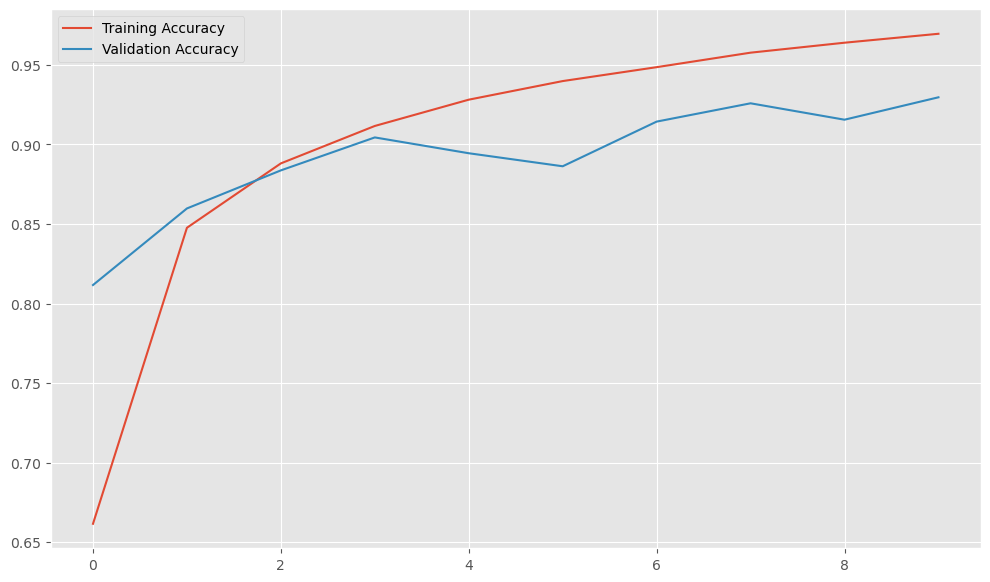

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
no_of_epochs = history.params['epochs']
len(history.history['accuracy']) == no_of_epochs
plt.figure(figsize=(12, 7))

plt.plot(range(no_of_epochs), acc, label='Training Accuracy')
plt.plot(range(no_of_epochs), val_acc, label='Validation Accuracy')

plt.legend()
plt.show()

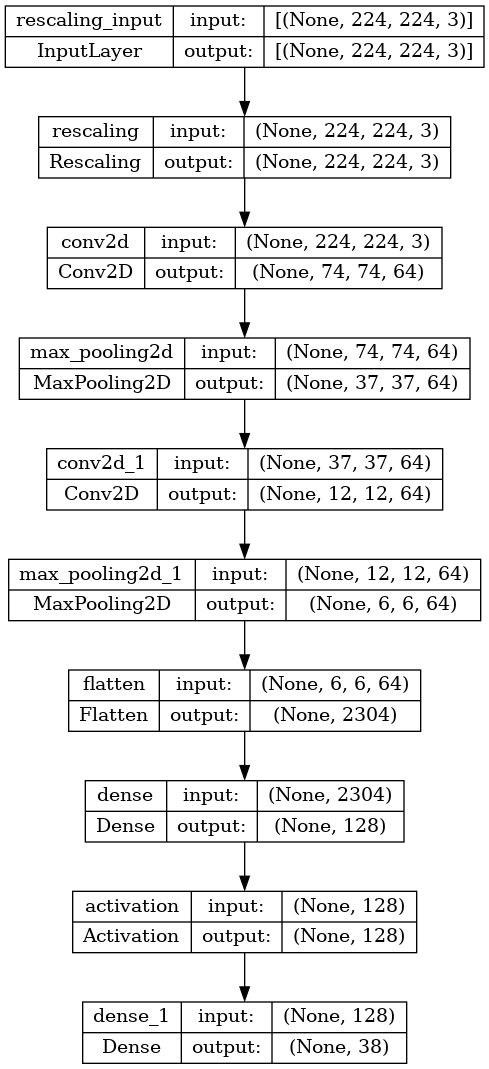

In [17]:
from tensorflow.keras.utils import to_categorical, plot_model
plot_model(classifier, to_file='cnn-mnist.png', show_shapes=True)